In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("~/Downloads/sort.csv")
df = df.sample(frac=1, random_state=555).reset_index(drop=True)

df.rnd = df.apply(axis=1, func = lambda x: x.n / 2)
df.shape

(8950, 11)

In [3]:
df.head(10)

,n,subtree_cnt,depth,avg_depth,max_depth,height,avg_height,max_height,loexpect,hiexpect,rnd
0,15,6,2,2.400000,5,3,1.200000,5,5.402384,9.597616,7.5
1,14,1,3,1.857143,3,0,0.785714,3,6.551001,7.448999,7.0
2,14,4,1,3.357143,8,3,3.000000,8,11.600177,2.399823,7.0
3,15,2,5,2.733333,6,1,1.533333,6,6.626778,8.373222,7.5
4,15,1,4,1.933333,4,0,1.000000,4,6.326499,8.673501,7.5
5,11,1,2,1.545455,3,0,0.727273,3,4.352941,6.647059,5.5
6,14,5,1,1.857143,3,2,0.714286,3,10.024106,3.975894,7.0
7,12,1,2,2.666667,6,0,1.833333,6,3.505525,8.494475,6.0
8,14,1,7,3.785714,8,0,2.642857,8,6.402563,7.597437,7.0
9,9,4,3,2.333333,5,2,1.666667,5,3.954545,5.045455,4.5


In [4]:
scaleSubtree = df.apply(axis=1, func = lambda x: x.subtree_cnt / x.n).rename("ssubtree")
scaleDepth = df.apply(axis=1, func = lambda x: x.depth / x.max_depth).rename("sdepth")
scaleHeight = df.apply(axis=1, func = lambda x: x.height / x.max_height).rename("sheight");

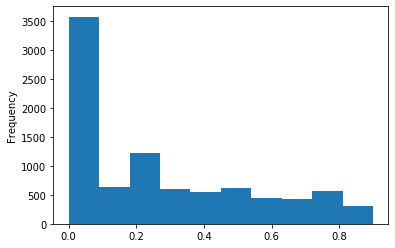

In [5]:
scaleHeight.plot(kind="hist");

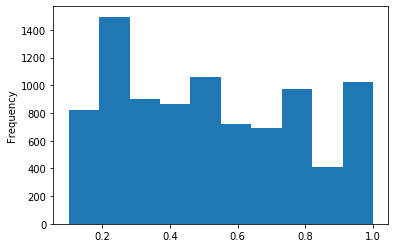

In [6]:
scaleDepth.plot(kind="hist");

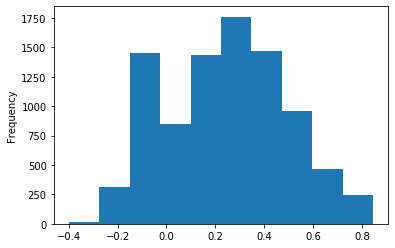

In [7]:
# hiexpect is the expected number of steps if we start from the high values
# loexpect is if we start from the low values.
# we should choose between the two depending on the depth:
df['alt'] = df.apply(axis=1, func = lambda x: x.hiexpect if x.depth % 2 else x.loexpect)
importance = df.apply(axis=1, func = lambda x: (x.rnd-x.alt)/x.rnd)
importance.plot(kind="hist");

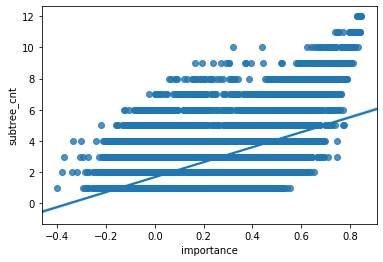

In [8]:
# linear regression will not do
df['importance'] = importance
sns.regplot(x="importance", y="subtree_cnt", data=df);

In [9]:
# feature engineering
df['isleaf'] = df.apply(axis=1, func = lambda x: x.height == 0)
df.head(5)

,n,subtree_cnt,depth,avg_depth,max_depth,height,avg_height,max_height,loexpect,hiexpect,rnd,alt,importance,isleaf
0,15,6,2,2.400000,5,3,1.200000,5,5.402384,9.597616,7.5,5.402384,0.279682,False
1,14,1,3,1.857143,3,0,0.785714,3,6.551001,7.448999,7.0,7.448999,-0.064143,True
2,14,4,1,3.357143,8,3,3.000000,8,11.600177,2.399823,7.0,2.399823,0.657168,False
3,15,2,5,2.733333,6,1,1.533333,6,6.626778,8.373222,7.5,8.373222,-0.116430,False
4,15,1,4,1.933333,4,0,1.000000,4,6.326499,8.673501,7.5,6.326499,0.156467,True


In [10]:
# featire engineering
bdepth = df.apply(axis=1, func = lambda x: x.depth > x.avg_depth).rename("bdepth")
bheight = df.apply(axis=1, func = lambda x: x.height > x.avg_height).rename("bheight")

In [11]:
X = pd.DataFrame([scaleSubtree, scaleDepth, bdepth, scaleHeight, bheight, df.isleaf]).transpose()
y = df.importance
X.head(15)

,ssubtree,sdepth,bdepth,sheight,bheight,isleaf
0,0.400000,0.400000,0.0,0.600000,1.0,0.0
1,0.071429,1.000000,1.0,0.000000,0.0,1.0
2,0.285714,0.125000,0.0,0.375000,0.0,0.0
3,0.133333,0.833333,1.0,0.166667,0.0,0.0
4,0.066667,1.000000,1.0,0.000000,0.0,1.0
5,0.090909,0.666667,1.0,0.000000,0.0,1.0
6,0.357143,0.333333,0.0,0.666667,1.0,0.0
7,0.083333,0.333333,0.0,0.000000,0.0,1.0
8,0.071429,0.875000,1.0,0.000000,0.0,1.0
9,0.444444,0.600000,1.0,0.400000,1.0,0.0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=61)
model = RandomForestRegressor(max_depth=8, n_estimators=100, random_state=82).fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

train score: 0.8786425328816494
test score: 0.8606552035705355


In [13]:
predict = pd.Series(model.predict(X)).rename("predict")
pd.concat([df, predict], axis=1).head(15)

,n,subtree_cnt,depth,avg_depth,max_depth,height,avg_height,max_height,loexpect,hiexpect,rnd,alt,importance,isleaf,predict
0,15,6,2,2.400000,5,3,1.200000,5,5.402384,9.597616,7.5,5.402384,0.279682,False,0.407775
1,14,1,3,1.857143,3,0,0.785714,3,6.551001,7.448999,7.0,7.448999,-0.064143,True,-0.001216
2,14,4,1,3.357143,8,3,3.000000,8,11.600177,2.399823,7.0,2.399823,0.657168,False,0.646472
3,15,2,5,2.733333,6,1,1.533333,6,6.626778,8.373222,7.5,8.373222,-0.116430,False,-0.100182
4,15,1,4,1.933333,4,0,1.000000,4,6.326499,8.673501,7.5,6.326499,0.156467,True,-0.000651
5,11,1,2,1.545455,3,0,0.727273,3,4.352941,6.647059,5.5,4.352941,0.208556,True,0.270050
6,14,5,1,1.857143,3,2,0.714286,3,10.024106,3.975894,7.0,3.975894,0.432015,False,0.396998
7,12,1,2,2.666667,6,0,1.833333,6,3.505525,8.494475,6.0,3.505525,0.415746,True,0.323460
8,14,1,7,3.785714,8,0,2.642857,8,6.402563,7.597437,7.0,7.597437,-0.085348,True,-0.122081
9,9,4,3,2.333333,5,2,1.666667,5,3.954545,5.045455,4.5,5.045455,-0.121212,False,-0.019944


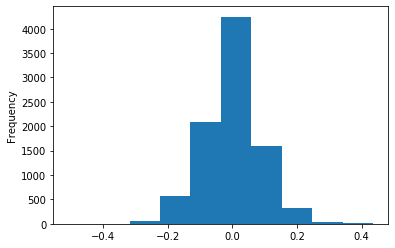

In [14]:
(predict-importance).plot(kind="hist");

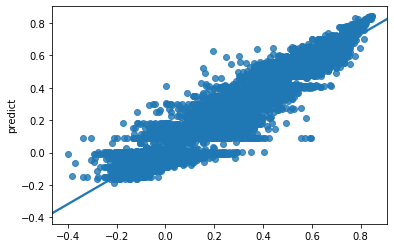

In [15]:
sns.regplot(x=importance, y=predict);

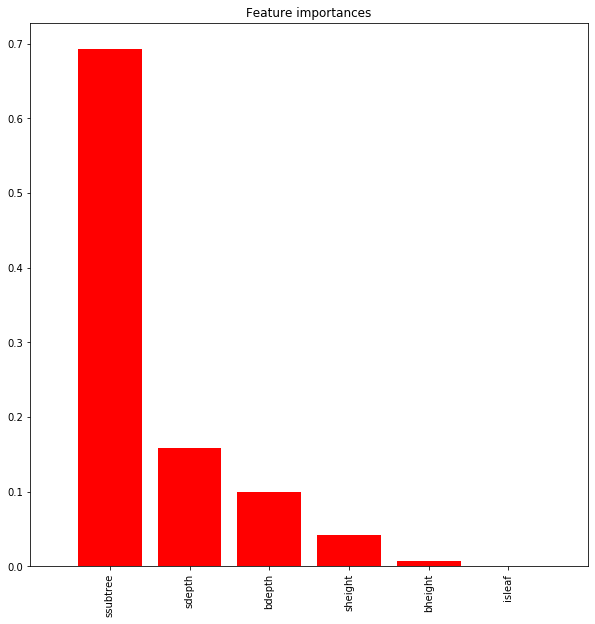

In [16]:
def random_forest_features(model, X, top=-1):
    importances = model.feature_importances_
    std = np.std([model.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1][:top]
    
    plt.figure(figsize=(10, 10))
    plt.title("Feature importances")
    plt.bar(range(indices.size), importances[indices], color="r", yerr=std[indices], align="center")
    plt.xticks(range(indices.size), X.columns, rotation='vertical')
    plt.xlim([-1, indices.size])
    plt.show()

random_forest_features(model, X, top=20)

In [17]:
from sklearn.externals import joblib

joblib.dump(model, 'predict.model');